1.Воспользуйтесь базой данных ithub на нашем сервере
Загрузите и выгрузите данные

1) Загрузите в DataFrame из базы данных ithub таблицы university информацию о количестве учебных заведений в каждом городе.

2) Сохраните данные из DataFrame в файлы xlsx и html   

**Отобразите данные с помощью matplotlib**

3) Отберите топ-5 городов по количеству вузов в отдельный DataFrame   

4) Выведите столбчатую диаграмму красным цветом для отображения топ-5 городов  

In [6]:
import pandas as pd

In [3]:
# Устанавливаем коннектор для базы данных mysql
!pip install mysql-connector-python
# Подключаем библиотеку
import mysql.connector as connection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Создаем коннект к базе данных ithub на нашем учебном сервере
db = connection.connect(host="db-learning.ithub.ru", database = 'ithub', user="teacher", passwd="a-007-007-007", charset="utf8mb3")
# charset='utf8mb4' - ???

In [13]:
# 1) Загрузите в DataFrame из базы данных ithub таблицы university информацию о количестве учебных заведений в каждом городе.
df_univ_in_cities = pd.read_sql("SELECT `city`, count(*) FROM university GROUP BY city", db)
df_univ_in_cities

,city,count(*)
0,None,19
1,Астрахань,2
2,Белгород,1
3,Владимир,1
4,Волгоград,1
5,Воронеж,4
6,Вятка,1
7,Екатеринбург,1
8,Иваново,3
9,Казань,4


In [17]:
# 2) Сохраните данные из DataFrame в файлы xlsx и html

# Сохранение в xlsx
df_univ_in_cities.to_excel('univ_in_cities.xlsx', na_rep =0, index=False)

# Сохранение в html
df_univ_in_cities.to_html('univ_in_cities.html', index=False)



In [28]:
# Отобразите данные с помощью matplotlib
# 3) Отберите топ-5 городов по количеству вузов в отдельный DataFrame

df_univ_in_cities = df_univ_in_cities.sort_values(by='count(*)', ascending=False)

# Удаляю строку, о кол. университетов в неизвестных городах
df_univ_in_cities = df_univ_in_cities.dropna()

df_top_cities_with_univ = df_univ_in_cities.head(5)
df_top_cities_with_univ

,city,count(*)
13,Москва,29
23,Санкт-Петербург,5
5,Воронеж,4
9,Казань,4
24,Саратов,3


In [30]:
# 4) Выведите столбчатую диаграмму красным цветом для отображения топ-5 городов
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 5 artists>

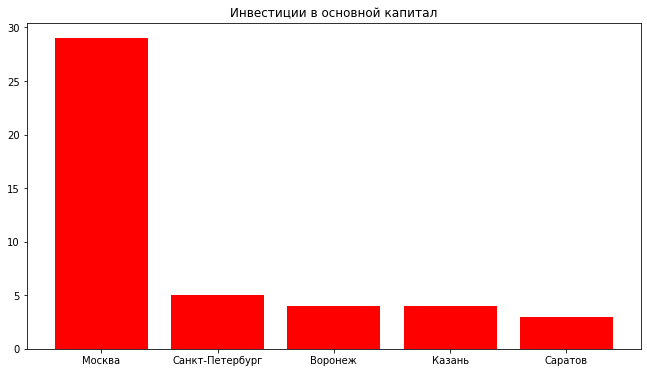

In [36]:
plt.figure(figsize=(11, 6))

# Наносим надписи
plt.title("Инвестиции в основной капитал")

# Стандартная столбчатая диаграмма
plt.bar(df_top_cities_with_univ["city"], df_top_cities_with_univ["count(*)"], color='red')